In [6]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#load the data
import pandas as pd
automobile_name = 'data/Automobile.csv'
automobile = pd.read_csv(automobile_name, sep='#', decimal='.', header=None, error_bad_lines=False, 
                   names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])

#check the data type
automobile.dtypes

#deal with the data of symboling attribute
automobile['symboling'].replace(4,3,inplace=True)
symboling=automobile['symboling']
symboling.value_counts()

#deal with the data of normalized-losses attribute
automobile['normalized-losses'].replace(25,65,inplace=True)
automobile['normalized-losses'].fillna(automobile['normalized-losses'].median(axis=0),inplace=True)
normalized_losses=automobile['normalized-losses']
normalized_losses.value_counts()

#deal with the data of make attribute
automobile['make'].replace('vol00112ov','volvo',inplace=True)
make=automobile['make'].str.lower().str.strip()
make.value_counts()

#deal with the data of fuel-type attribute
fuel_type=automobile['fuel-type'].str.lower().str.strip()
fuel_type.value_counts()

#deal with the data of aspiration attribute
automobile['aspiration'].replace('turrrrbo','turbo',inplace=True)
aspiration = automobile['aspiration'].str.lower().str.strip()
aspiration.value_counts()

#deal with the data of num-of-doors attribute
automobile['num-of-doors'].fillna('-1',inplace=True)
automobile['num-of-doors'].replace('fourR','four',inplace=True)
num_of_doors = automobile['num-of-doors'].str.lower().str.strip()
num_of_doors.value_counts()

#deal with the data of body-style attribute
body_style = automobile['body-style'].str.lower().str.strip()
body_style.value_counts()

#deal with the data of drive-wheels attribute
drive_wheels = automobile['drive-wheels'].str.lower().str.strip()
drive_wheels.value_counts()

#deal with the data of engine-location attribute
engine_location = automobile['engine-location'].str.lower().str.strip()
engine_location.value_counts()

#deal with the data of wheel-base attribute
wheel_base=automobile['wheel-base']
wheel_base.value_counts()

#deal with the data of length attribute
length=automobile['length']
length.value_counts()

#deal with the data of width attribute
width=automobile['width']
width.value_counts()

#deal with the data of height attribute
height=automobile['height']
height.value_counts()

#deal with the data of curb-weight attribute
curb_weight=automobile['curb-weight']
curb_weight.value_counts()

#deal with the data of engine-type attribute
engine_type = automobile['engine-type'].str.lower().str.strip()
engine_type.value_counts()

#deal with the data of num-of-cylinders attribute
num_of_cylinders = automobile['num-of-cylinders'].str.lower().str.strip()
num_of_cylinders.value_counts()

#deal with the data of engine-size attribute
engine_size=automobile['engine-size']
engine_size.value_counts()

#deal with the data of fuel-system attribute
fuel_system = automobile['fuel-system'].str.lower().str.strip()
fuel_system.value_counts()

#deal with the data of bore attribute
automobile['bore'].fillna(automobile['bore'].median(axis=0),inplace=True)
bore=automobile['bore']
bore.value_counts()

#deal with the data of stroke attribute
automobile['stroke'].fillna(automobile['stroke'].median(axis=0),inplace=True)
stroke=automobile['stroke']
stroke.value_counts()

#deal with the data of compression-ratio attribute
compression_ratio=automobile['compression-ratio']
compression_ratio.value_counts()

#deal with the data of horsepower attribute
automobile['horsepower'].fillna(automobile['horsepower'].median(axis=0),inplace=True)
horsepower=automobile['horsepower']
horsepower.value_counts()

#deal with the data of peak-rpm attribute
automobile['peak-rpm'].fillna(automobile['peak-rpm'].median(axis=0),inplace=True)
peak_rpm=automobile['peak-rpm']
peak_rpm.value_counts()

#deal with the data of city-mpg attribute
city_mpg=automobile['city-mpg']
city_mpg.value_counts()

#deal with the data of highway-mpg attribute
highway_mpg=automobile['highway-mpg']
highway_mpg.value_counts()

#deal with the data of price attribute
automobile['price'].fillna(automobile['price'].median(axis=0),inplace=True)
automobile['price'].replace(0.0,automobile['price'].median(axis=0),inplace=True)
price=automobile['price']
price.value_counts()

#present the processed data
automobile_data=pd.concat([symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price],axis=1,join='inner')
automobile_data

#store processed data to a .csv file
automobile_data.to_csv('automobile_data.csv',index=False,sep=',')

#present the numeric data
automobile_numeric=pd.concat([normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price],axis=1,join='inner')
automobile_numeric

#store numeric data into a .csv file
automobile_numeric.to_csv('automobile_numeric.csv',index=False,sep=',')




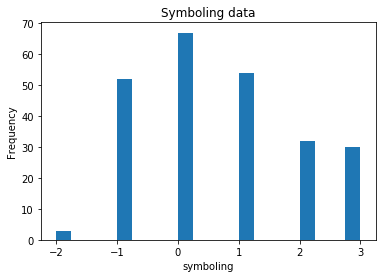

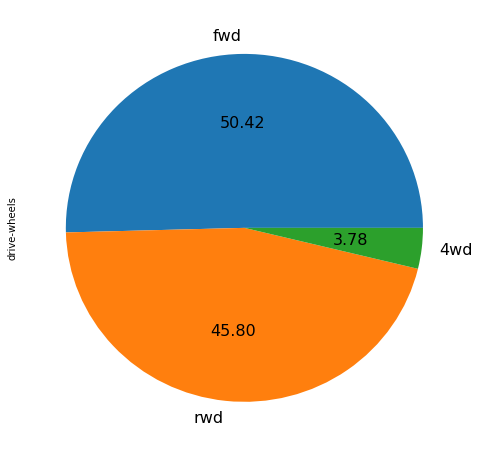

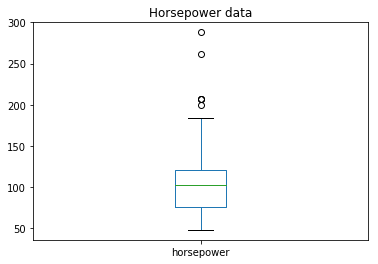

In [7]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values
#Code goes after this line

# Data exploration of symboling
import matplotlib.pyplot as plt
automobile_data['symboling'].plot(kind='hist',bins=20)
plt.title('Symboling data')
plt.xlabel('symboling')
plt.show()

# Data exploration of drive-wheels
automobile_data['drive-wheels'].value_counts().plot(kind='pie',autopct='%.2f', figsize=(8,8),fontsize=16)
plt.show()

# Data exploration of horsepower
automobile_data['horsepower'].plot(kind='box',title='Horsepower data')
plt.show()

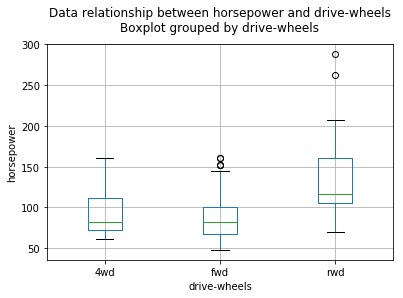

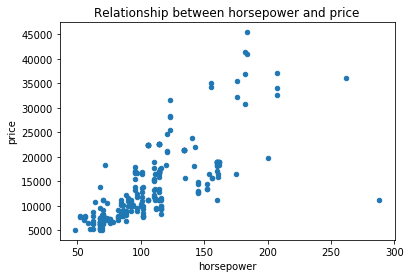

<function matplotlib.pyplot.show>

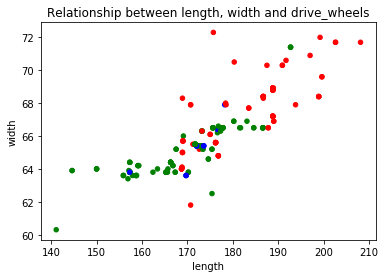

In [8]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line

# Data relationship between horsepower and aspiration
_,pl=plt.subplots()
automobile_data.dropna().boxplot(column='horsepower', by='drive-wheels',ax=pl)
pl.set_ylabel('horsepower')
pl.set_title('Data relationship between horsepower and drive-wheels',y=1.10)
plt.show()

# Data relationship between horsepower and price
automobile_data.plot(kind='scatter',x=21,y=25, title='Relationship between horsepower and price')
plt.show()

# Data relationship between length, width and drive_wheels
v=automobile_data['drive-wheels'].unique()
m_1=automobile_data['drive-wheels']==v[0]
m_2=automobile_data['drive-wheels']==v[1]
m_3=automobile_data['drive-wheels']==v[2]

automobile_data.loc[m_1, 'drive-wheels'] = 0
automobile_data.loc[m_2, 'drive-wheels'] = 1
automobile_data.loc[m_3, 'drive-wheels'] = 2

automobile_data['drive-wheels'].value_counts()

colors_palette = {0:'red',1:'green',2:'blue'} # rwd fwd 4wd

colors = [colors_palette[c] for c in automobile_data['drive-wheels']]
automobile_data.plot(kind='scatter', x=10, y=11, c=colors, title='Relationship between length, width and drive_wheels')

plt.show

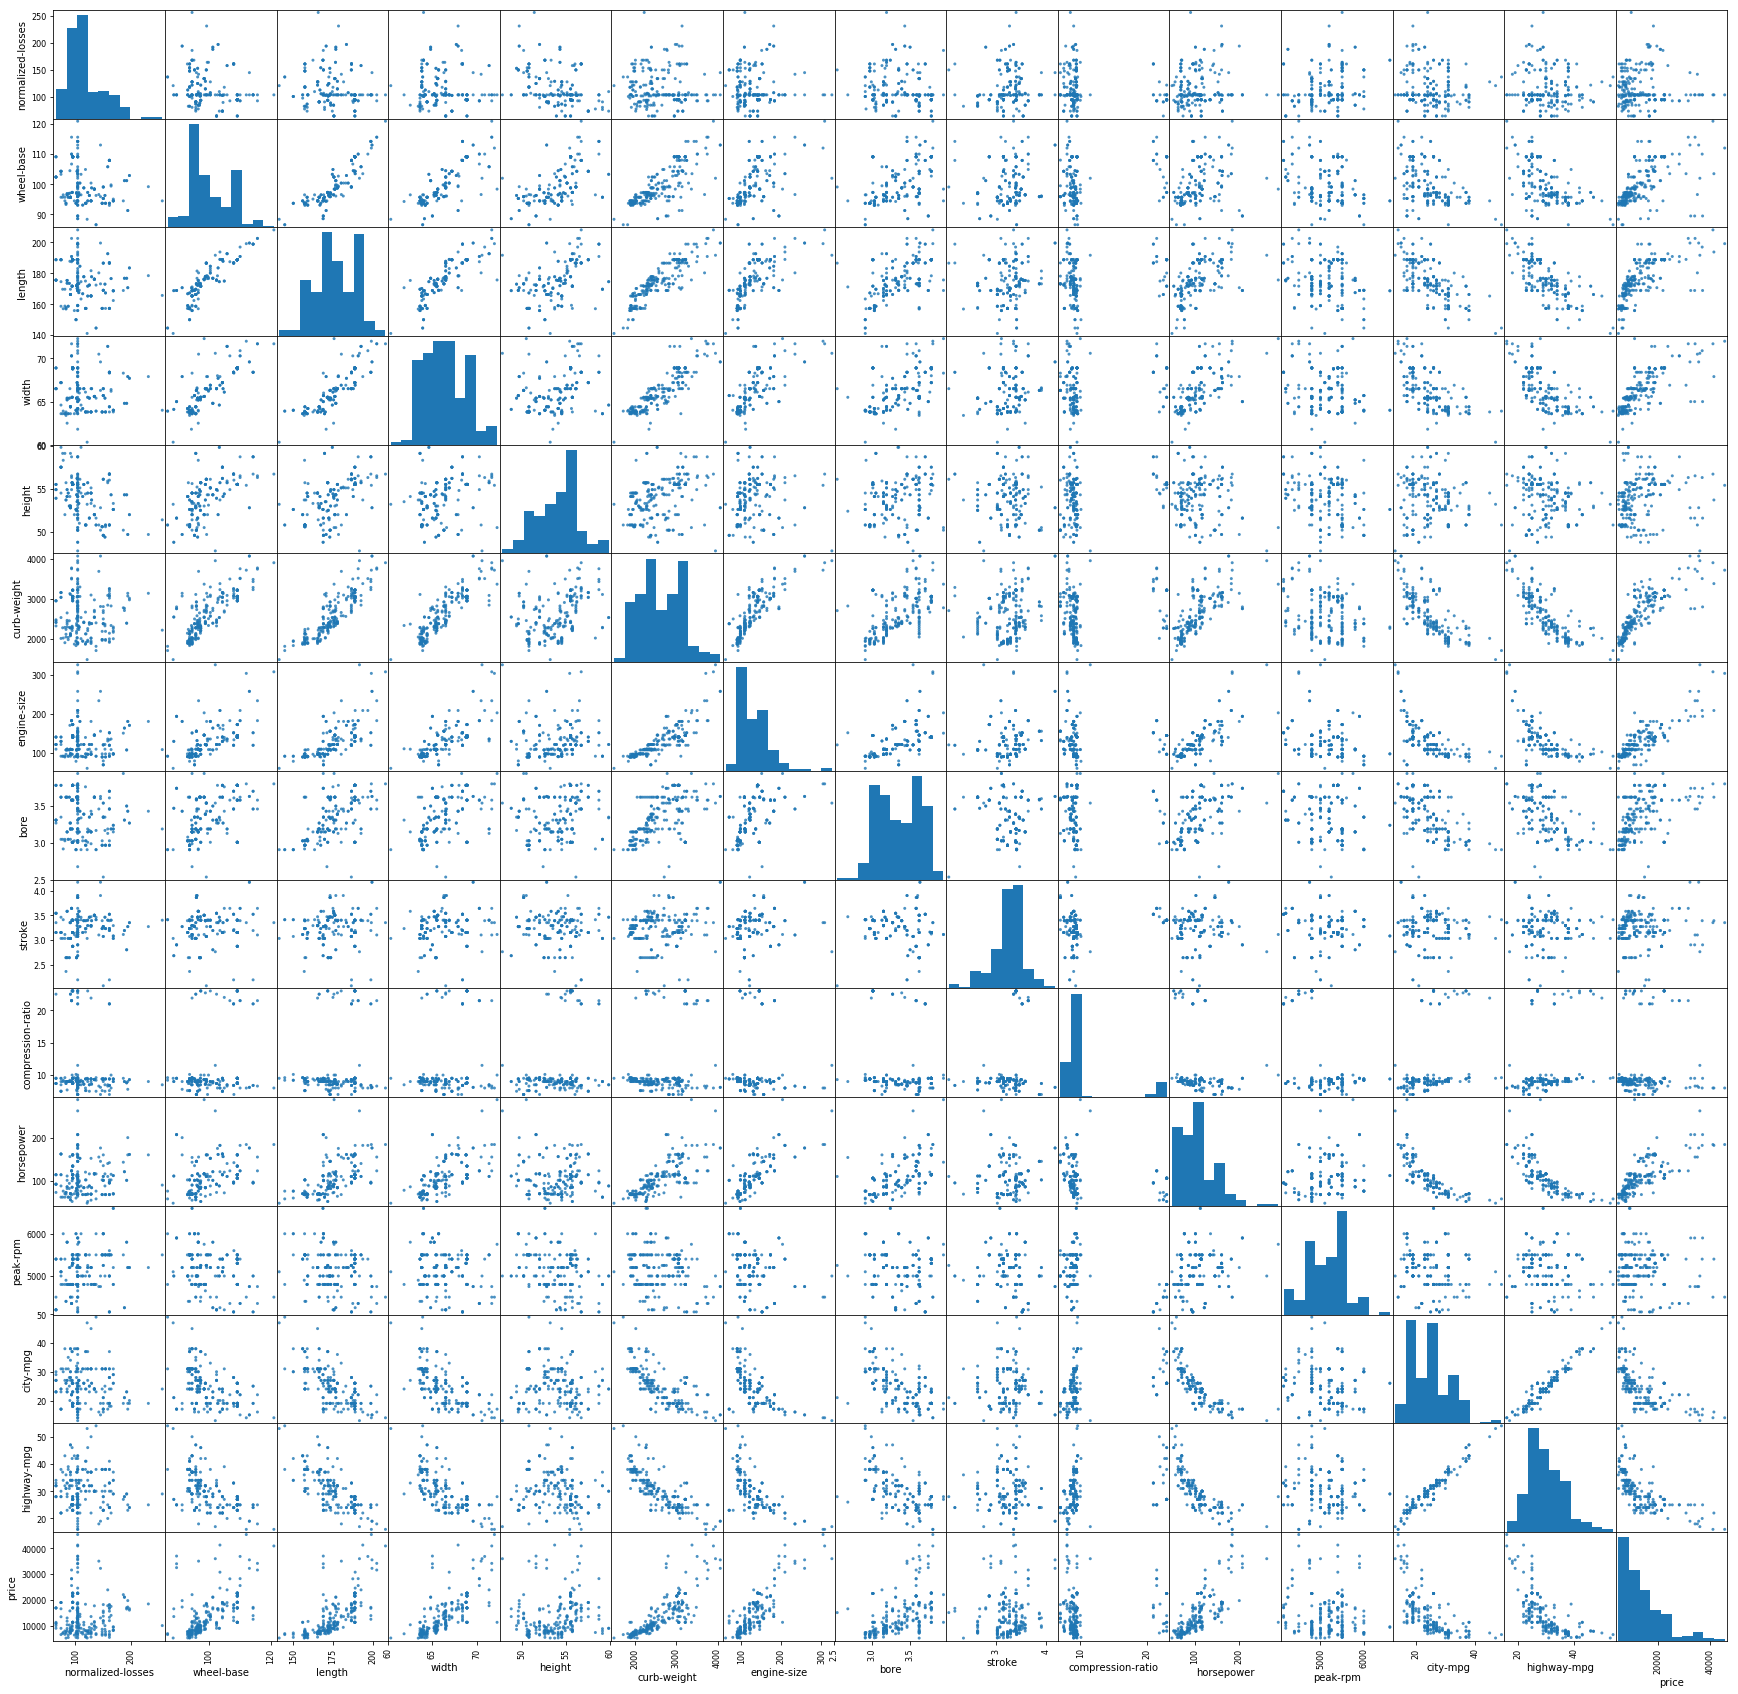

In [4]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line

# Scatter matrix of all numerical data
from pandas.plotting import scatter_matrix
scatter_matrix(automobile_numeric,alpha=0.8,figsize=(30,30),diagonal='hist')
plt.show()